# Imports 

In [1]:
print('hi')

hi


In [2]:
import sys
sys.path

['/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow',
 '/home/eag190/miniconda3/envs/simulations/lib/python39.zip',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/lib-dynload',
 '',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages',
 '/cache/home/eag190/ECD_control',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages/quantum_optimal_control-0.1.0-py3.9.egg']

In [3]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [4]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [5]:
%load_ext autoreload
%autoreload 2

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# 3DMM2 parameters

In [6]:
# chi = Peak splitting MHz
chis = 2*array([-33, -33]) 
kappas  = array([0,0]) # kHz

# Multimode circle grape

In [7]:
#TODO: Figure out why relative import doesn't work
from circle_grape_v3 import *

done


In [8]:
transmon_levels = 2

#  Params :  $\alpha = 30.0 , \delta_c = -0.030$ GHz, $\tau = 500$ ns, $\Omega_{max} =1$ MHz

In [9]:
mode = 1
mode_levels = 10
chi,kappa = chis[mode]*1e-6,kappas[mode]*1e-6

In [10]:
import sys
sys.path

['/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow',
 '/home/eag190/miniconda3/envs/simulations/lib/python39.zip',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/lib-dynload',
 '',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages',
 '/cache/home/eag190/ECD_control',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages/quantum_optimal_control-0.1.0-py3.9.egg']

In [11]:
data_path = ''#'/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'

In [12]:


# ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
#                         total_time = total_time, steps = steps,max_amp = 0.001, 
#                         taylor_terms = None,is_dressed=False, 
#                         convergence = convergence, reg_coeffs =  reg_coeffs,
#                         plot_only_g = True,
#                         states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
#                         file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)

In [13]:
# hf = op.openfile()
# min(hf['error'])

In [14]:
import pandas as pd
fname = 'times_and_chis_sweep_oct31.csv'
columns=['chi', 'time', 'error']
df = None

TypeError: 'NoneType' object is not subscriptable

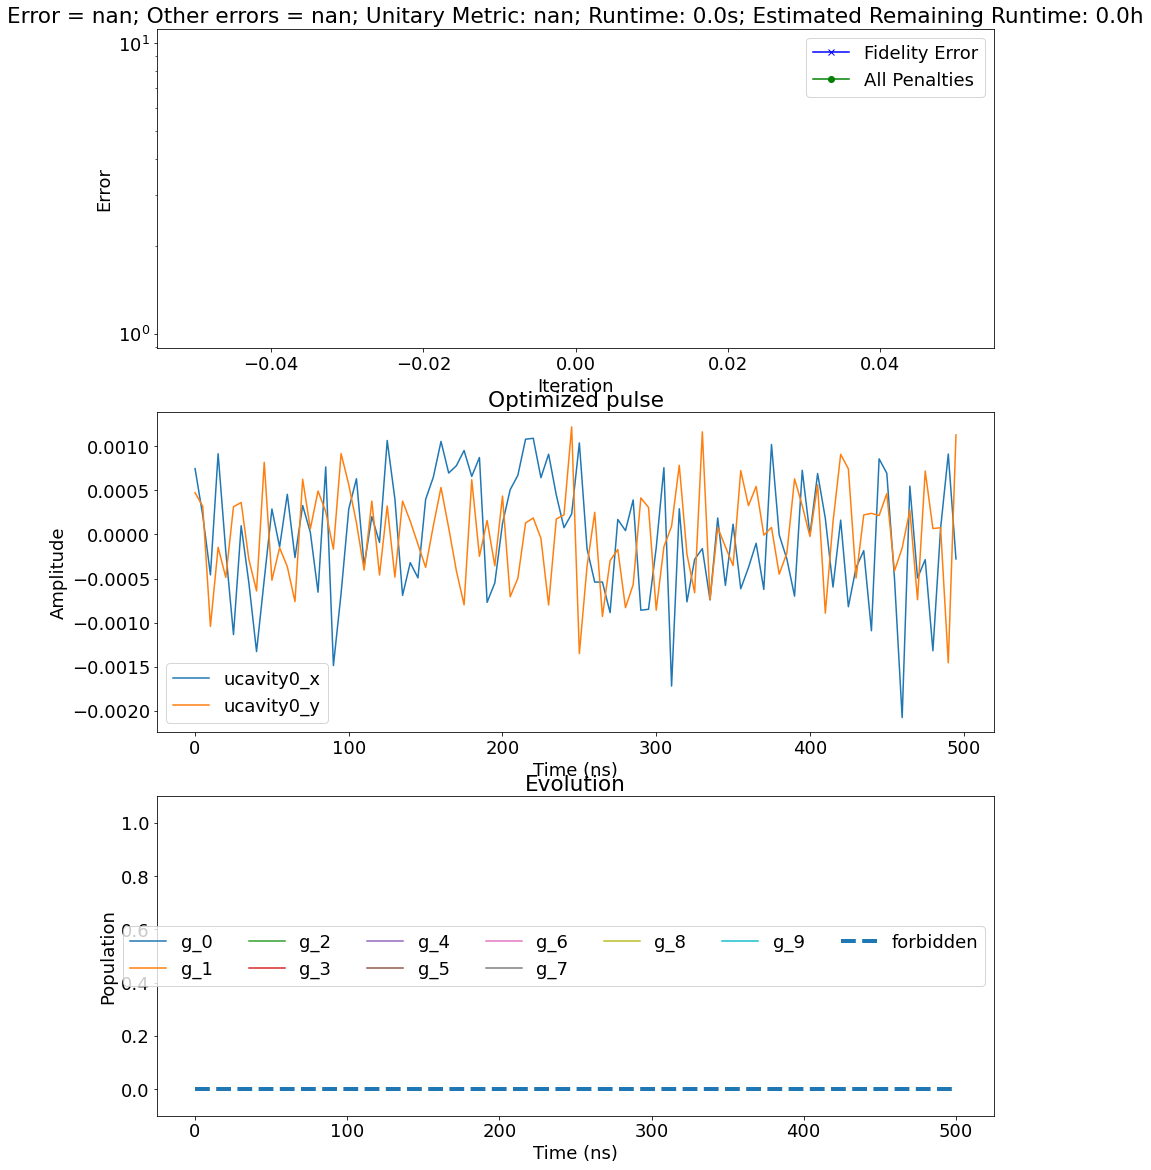

In [17]:
times = [100*(6-i) for i in range(1, 6, 1)]
chi_mult = [100]
fids = []
for chi_mult_factor in chi_mult:
    chi = chis[mode]*chi_mult_factor
    print(chi)
    circle_grape_params = {"chis":[chi],"kappas":[0],"alpha":30.0,"delta_c":-0.10}

    op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                                number_of_modes = 1,hparams = circle_grape_params,add_disp_kerr=False)
    
    
    for t in times:

        print(t)
        states_forbidden_list = []
        total_time = t
        steps  = int(t/5 )#number of points over the total time where amplitudes will be specified

        convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 1000,
                       'conv_target': 3e-4, 'learning_rate_decay': 500.0}


        reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
                      'states_forbidden_list':states_forbidden_list,
                      'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}



        initial_guess = None

        ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
                                total_time = total_time, steps = steps,max_amp = 1e-3, 
                                taylor_terms = None,is_dressed=False, 
                                convergence = convergence, reg_coeffs =  reg_coeffs,
                                plot_only_g = True,
                                states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                                file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)
        hf = op.openfile()
        err = min(hf['error'])
        
        df_new = pd.DataFrame([[chi, total_time, err]], columns=columns)
        if df is None : 
            df = df_new
        else:
            df = df.append(df_new, ignore_index = True)
        df.to_csv(fname, index=False)
#fids

In [15]:
fids

[0.30793104, 0.30801353, 0.30788857, 0.30789015, 0.30787355]

Text(0.5, 1.0, 'g0->g1')

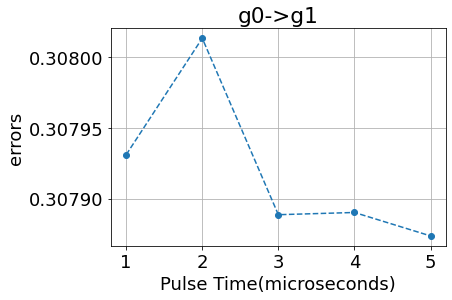

In [16]:
import matplotlib.pyplot as plt
tt = [i/1000 for i in times]
plt.plot(tt, fids, marker = 'o', linestyle = '--')
plt.grid(True)
plt.xlabel('Pulse Time(microseconds)')
plt.ylabel('errors')
plt.title('g0->g1')

In [3]:
import numpy as np 
np.log10(10)

1.0

Text(0.5, 1.0, 'g0->g1; 2000 microseconds')

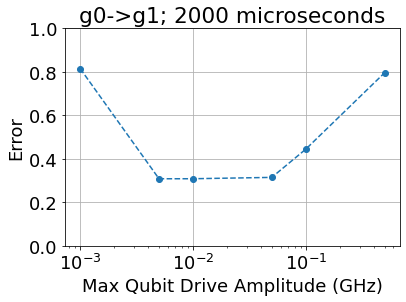

In [18]:
import matplotlib.pyplot as plt
#amps = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
#errs= [0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]
plt.semilogx(amps, fids, marker = 'o', linestyle = '--')
plt.grid(True)
#plt.plot(amps, fids, )
plt.xlabel('Max Qubit Drive Amplitude (GHz)')
plt.ylabel('Error')
plt.ylim([0,1])
plt.title('g0->g1; 2000 microseconds')

In [2]:
import matplotlib.pyplot as plt

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


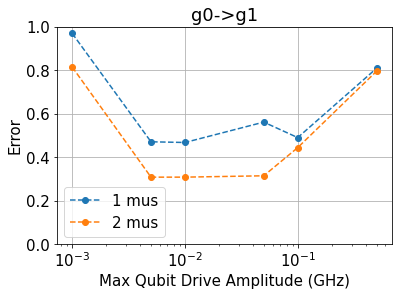

In [9]:
amps = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
errs_1= [0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305] #1000
errs_2 = [0.8146359, 0.30784446, 0.30795062, 0.31416863, 0.4436195, 0.7949593] #2000
plt.semilogx(amps, errs_1, marker = 'o', linestyle = '--', label = '1 mus')
plt.semilogx(amps, errs_2, marker = 'o', linestyle = '--', label = '2 mus')
plt.grid(True)
#plt.plot(amps, fids, )
plt.xlabel('Max Qubit Drive Amplitude (GHz)')
plt.ylabel('Error')
plt.ylim([0,1])
plt.title('g0->g1')
plt.legend()

In [8]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

[0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]

In [ ]:
hf = op.openfile()

In [ ]:
hf['error'][-1]

In [ ]:
op.plot_pulses()

In [ ]:
ss

In [ ]:
len(ss[0][0])

In [ ]:
op.fidelity()

In [ ]:
import os 
data_path = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'
file_path = 'test.h5'
file_path_f = os.path.join(data_path, file_path)
file_path_f

In [ ]:
hf = h5py.File(file_path_f, 'w')


In [ ]:
get_dressed_info

In [ ]:
w_c, v_c, dressed_id = get_dressed_info(op.H_rot())

In [ ]:
w_c

In [ ]:
v_c

In [ ]:
dressed_id